In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pylab as plt

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%time
data_root = os.path.join("/", "Users", "ravinderboparai", "Documents", "DSA", "UC_Caseload_Model")

CPU times: user 15 µs, sys: 1e+03 ns, total: 16 µs
Wall time: 17.9 µs


In [44]:
training_data = pd.read_csv(os.path.join(data_root, 'training_dataset.csv'), 
                           encoding = "ISO-8859-1", engine='python', index_col = False) #encoding = "utf-8")

testing_data = pd.read_csv(os.path.join(data_root, 'testing_dataset.csv'), 
                           encoding = "ISO-8859-1", engine='python', index_col = False) #encoding = "utf-8")

In [45]:
training_data

,People on Universal Credit,Unemployment rate (%),CPI annual rate (%),FTSE 100,GBP/USD
0,1535143,3.9,2.1,6804.171579,1.266152
1,1618043,3.9,1.8,6850.648182,1.289861
2,1706607,3.8,1.9,7142.025500,1.301110
3,1816280,3.8,1.9,7194.823810,1.317267
4,1940904,3.8,2.1,7427.247500,1.302800
5,2026245,3.9,2.0,7287.482381,1.283957
6,2151015,3.8,2.0,7346.244500,1.267435
7,2249063,3.9,2.1,7542.238696,1.246117
8,2350373,3.8,1.7,7221.559524,1.215095
9,2454646,3.8,1.7,7310.380476,1.235329


In [46]:
testing_data

,People on Universal Credit,Unemployment rate (%),CPI annual rate (%),FTSE 100,GBP/USD
0,2546973,3.8,1.5,7228.213043,1.265761
1,2655220,3.8,1.5,7343.661429,1.288200
2,2730575,3.9,1.3,7370.365556,1.309623
3,2773081,4.0,1.8,7569.651364,1.308287
4,2915508,4.0,1.7,7348.719000,1.295325
5,3012736,4.0,1.5,5783.192273,1.235777
6,4210379,4.1,0.8,5717.885000,1.241627
7,5259937,4.1,0.5,5947.072632,1.229181
8,5430945,4.3,0.6,6240.394545,1.252523
9,5511859,4.5,1.0,6179.181304,1.268313


In [24]:
print(testing_data.shape, training_data.shape)

(22, 5) (10, 5)


In [17]:
import scipy.io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [25]:
y_train = training_data['People on Universal Credit'].to_numpy(copy=True, dtype=str)
y_test = testing_data['People on Universal Credit'].to_numpy(copy=True, dtype=str)

In [26]:
training_data = training_data.drop(columns=['People on Universal Credit'])
ploting_data = pd.DataFrame(testing_data['People on Universal Credit'])
testing_data = testing_data.drop(columns=['People on Universal Credit'])

In [27]:
X_train = training_data.to_numpy(copy=True, dtype=np.float32)
X_test = testing_data.to_numpy(copy=True, dtype=np.float32)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10, 4) (22, 4) (10,) (22,)


In [29]:
n=5
print(X_train[n], y_train[n])

[3.9000001e+00 2.0000000e+00 7.2874824e+03 1.2839565e+00] 2026245


In [30]:
reg = RandomForestRegressor()

In [31]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
preds = reg.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, preds)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [34]:
y_test

array(['2546973', '2655220', '2730575', '2773081', '2915508', '3012736',
       '4210379', '5259937', '5430945', '5511859', '5571239', '5639688',
       '5675985', '5789314', '5877471', '5899849', '5947512', '5972083',
       '5957521', '5938914', '5888753', '5842568'], dtype='<U21')

In [36]:
preds

array([2100191.4 , 2016791.15, 1998686.41, 1971362.99, 1987083.37,
       2011024.29, 1995747.87, 2015076.69, 1953519.16, 1776678.11,
       1708804.53, 1675850.79, 1690329.93, 1708804.53, 1708804.53,
       1708804.53, 1708804.53, 1708804.53, 1717923.53, 1708763.19,
       1770373.01, 1751694.14])

In [37]:
mse

11315667525238.207

In [38]:
testing_data['predictions']=preds

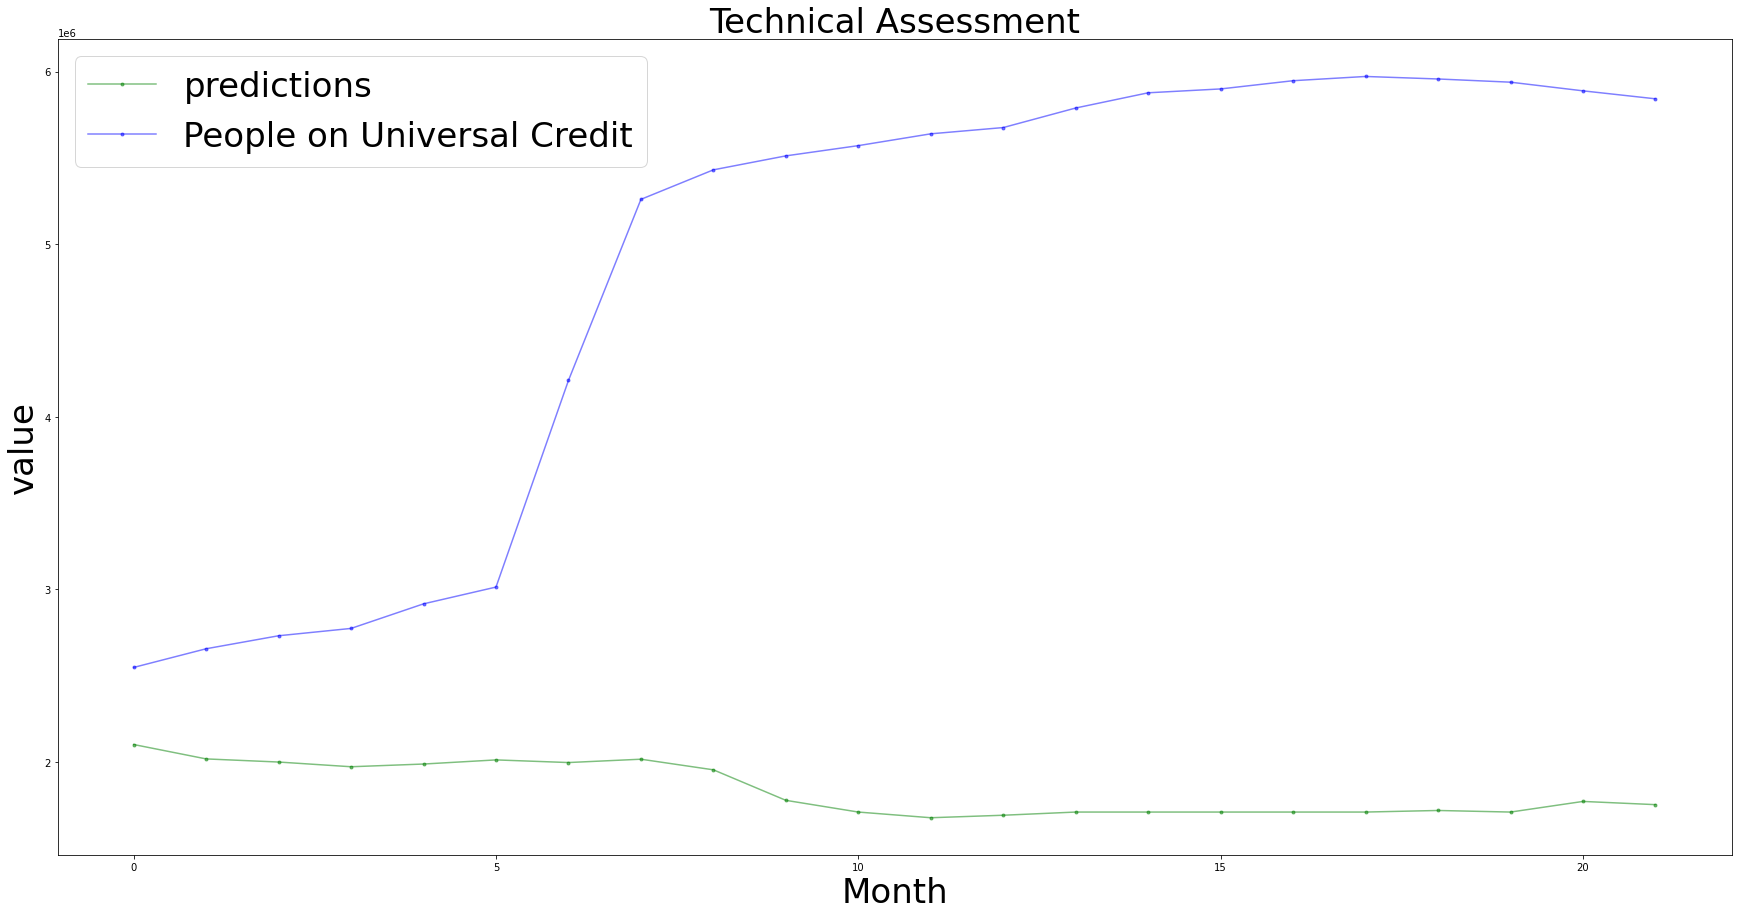

In [42]:
fig, ax = plt.subplots(figsize=(30, 15))
testing_data['predictions'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='green')
ploting_data['People on Universal Credit'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='blue')
#testing_data['predictions'].plot(ax=ax, marker ='.')
ax.set_xlabel('Month',  fontsize=34)
ax.set_ylabel('value',  fontsize=34)
ax.set_title('Technical Assessment', fontsize=34)
ax.legend(fontsize=34)